In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.utils import get_df, rename_values,remove_value, replace_values_by_condition
from ipynb.fs.full.plots import single_barplot
from ipynb.fs.full.bootstrapping_utils import single_option_sampling, bootstrapping, confidence_interval
from statistics import mean, pstdev

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
# two unexpected values appear = 0 and -77
# replace them to "I don't know" value

# replacing 0
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Problem_Understanding', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Collection', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Creation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Evaluation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Deployment', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Monitoring', "0", "I don't know", "eq")

# replacing -77
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Problem_Understanding', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Collection', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Creation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Evaluation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Deployment', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q1_ML_Life_Cycle_Importance_Model_Monitoring', "-77", "I don't know", "eq")

In [4]:
df[['Q1_ML_Life_Cycle_Importance_Problem_Understanding', 'Q1_ML_Life_Cycle_Importance_Data_Collection',
    'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', 'Q1_ML_Life_Cycle_Importance_Model_Creation',
    'Q1_ML_Life_Cycle_Importance_Model_Evaluation', 'Q1_ML_Life_Cycle_Importance_Model_Deployment',
    'Q1_ML_Life_Cycle_Importance_Model_Monitoring']].head()

,Q1_ML_Life_Cycle_Importance_Problem_Understanding,Q1_ML_Life_Cycle_Importance_Data_Collection,Q1_ML_Life_Cycle_Importance_Data_Pre-Processing,Q1_ML_Life_Cycle_Importance_Model_Creation,Q1_ML_Life_Cycle_Importance_Model_Evaluation,Q1_ML_Life_Cycle_Importance_Model_Deployment,Q1_ML_Life_Cycle_Importance_Model_Monitoring
2,Extremely Relevant,High Relevance,High Relevance,High Relevance,High Relevance,High Relevance,Neutral
3,High Relevance,High Relevance,High Relevance,Extremely Relevant,Extremely Relevant,Extremely Relevant,High Relevance
4,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant
5,Extremely Relevant,Neutral,Low Relevance,Neutral,High Relevance,Extremely Relevant,Neutral
6,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant,Extremely Relevant


In [5]:
columns = ['Q1_ML_Life_Cycle_Importance_Problem_Understanding', 'Q1_ML_Life_Cycle_Importance_Data_Collection',
           'Q1_ML_Life_Cycle_Importance_Data_Pre-Processing', 'Q1_ML_Life_Cycle_Importance_Model_Creation',
           'Q1_ML_Life_Cycle_Importance_Model_Evaluation', 'Q1_ML_Life_Cycle_Importance_Model_Deployment',
           'Q1_ML_Life_Cycle_Importance_Model_Monitoring']

In [6]:
valid_options_list = ['Extremely Relevant', 'High Relevance', 'Neutral', 
                      'Low Relevance', 'Not Relevant at All', 'I don\'t know']

In [13]:
bootstrapped_dfs = {}
for column in columns:
    valid_answers_list = list(df[column])
    bootstrapped_dict_data = bootstrapping(answers=valid_answers_list, all_options=valid_options_list,
                                       replacements=1000, population_size=1000)
    lower, X_mean, upper = confidence_interval(data_points=bootstrapped_dict_data['High Relevance'])
    print(column + "| Mean: " + str(X_mean) + "| Lower: " + str(lower) + "| Uper: " + str(upper))
    
    # get a pair of values between dict key and all the list values inside that key 
    # key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
    indexes = []
    values = []
    for idx in bootstrapped_dict_data:
        indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]))]
        values += bootstrapped_dict_data[idx]
    
    # build a dataframe from the population metrics
    bootstrapped_df = pd.DataFrame()
    bootstrapped_df['Importance'] = indexes
    bootstrapped_df['Value'] = values
    
    bootstrapped_dfs[column] = bootstrapped_df

Q1_ML_Life_Cycle_Importance_Problem_Understanding| Mean: 10.869| Lower: 10.839427993853985| Uper: 10.898572006146015
Q1_ML_Life_Cycle_Importance_Data_Collection| Mean: 24.2417| Lower: 24.19982653552935| Uper: 24.283573464470653
Q1_ML_Life_Cycle_Importance_Data_Pre-Processing| Mean: 27.2374| Lower: 27.195906187580558| Uper: 27.278893812419444
Q1_ML_Life_Cycle_Importance_Model_Creation| Mean: 29.398| Lower: 29.35722124585032| Uper: 29.43877875414968
Q1_ML_Life_Cycle_Importance_Model_Evaluation| Mean: 28.5696| Lower: 28.526240894317343| Uper: 28.61295910568266
Q1_ML_Life_Cycle_Importance_Model_Deployment| Mean: 26.898600000000002| Lower: 26.855950839620224| Uper: 26.94124916037978
Q1_ML_Life_Cycle_Importance_Model_Monitoring| Mean: 32.9476| Lower: 32.90165795442517| Uper: 32.993542045574834


Q1_ML_Life_Cycle_Importance_Problem_Understanding
Q1_ML_Life_Cycle_Importance_Data_Collection
Q1_ML_Life_Cycle_Importance_Data_Pre-Processing
Q1_ML_Life_Cycle_Importance_Model_Creation
Q1_ML_Life_Cycle_Importance_Model_Evaluation
Q1_ML_Life_Cycle_Importance_Model_Deployment
Q1_ML_Life_Cycle_Importance_Model_Monitoring


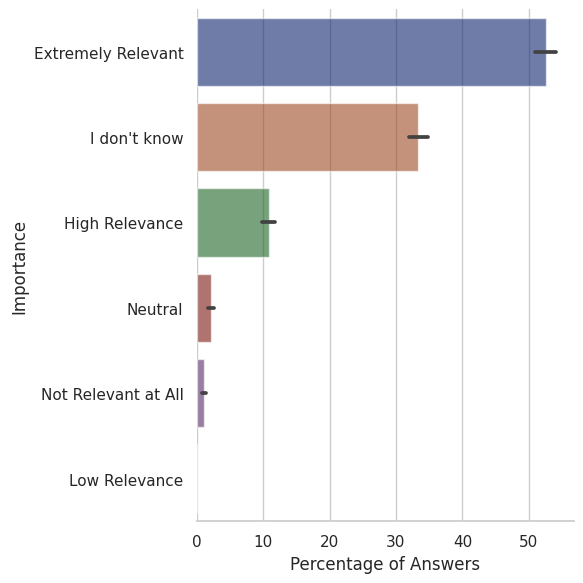

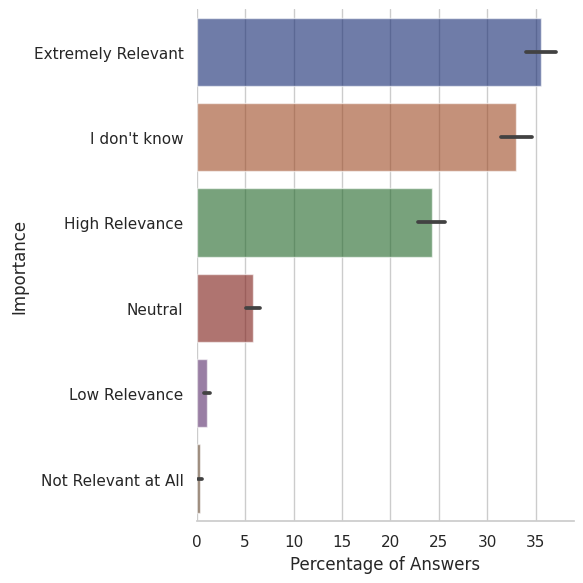

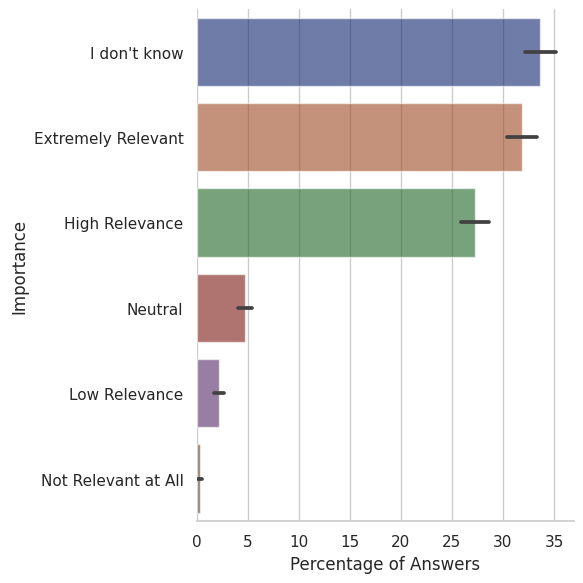

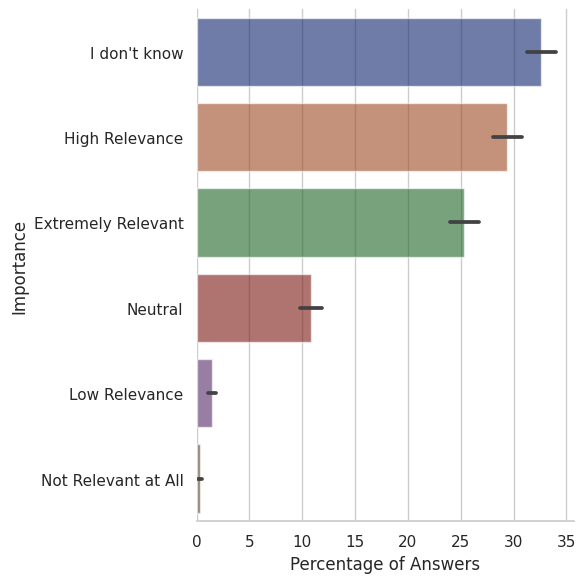

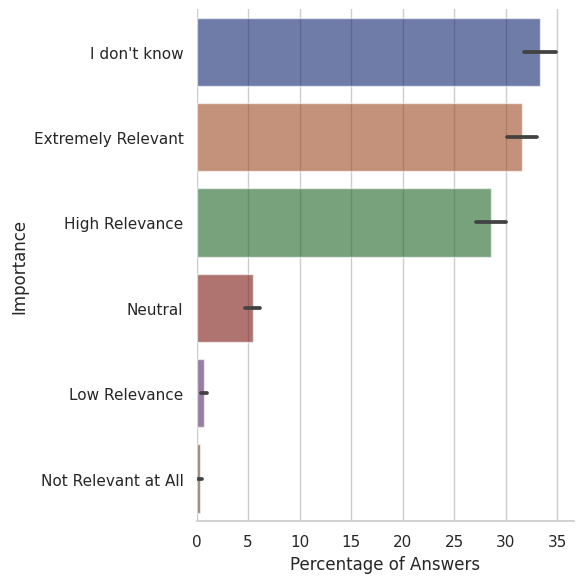

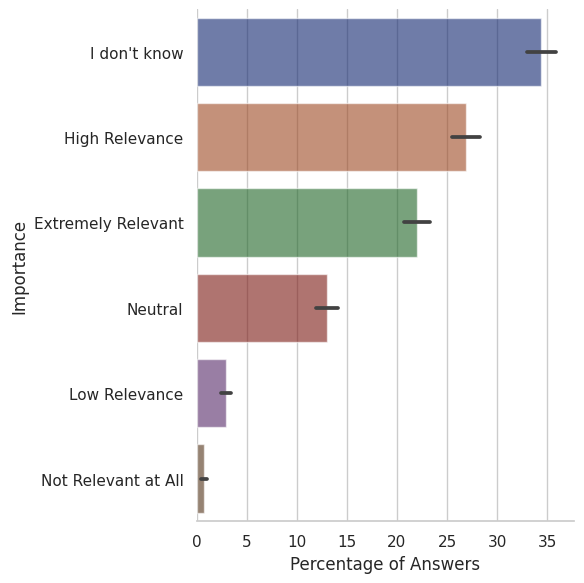

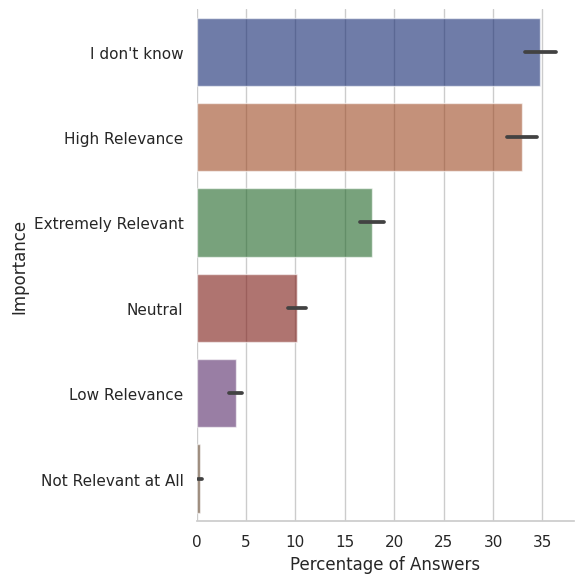

In [16]:
# draw bar plot graphics
for bootstrapped_column in bootstrapped_dfs:
    print(bootstrapped_column)
    q1_plot = sns.catplot(data=bootstrapped_dfs[bootstrapped_column].sort_values(by=['Value'], ascending = False), 
                          kind="bar", x="Value", y="Importance", ci="sd", 
                          palette="dark", alpha=.6, height=6)
    q1_plot.despine(left=True)
    q1_plot.set_axis_labels("Percentage of Answers", "Importance")